In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn import metrics

In [2]:
import matplotlib.pyplot as plt

In [82]:
df_gs = pd.read_csv('Final_GS_Data.csv')
df_ms = pd.read_csv('Final_MS_Data.csv')
df_msft = pd.read_csv('Final_MSFT_Data.csv')
df_jpm = pd.read_csv('Final_JPM_Data.csv')
df_amzn = pd.read_csv('Final_AMZN_Data.csv')

In [83]:
df_stocks = pd.concat([df_gs,df_ms,df_jpm,df_msft],axis=0)

In [84]:
df_stocks = df_stocks.rename(columns={'Unnamed: 0':'Date'})

In [85]:
df_stocks.head()

,Date,Open,High,Low,Volume,RSI,%K,Sentiment_index,Close
0,2021-01-04,267.000000,267.579987,260.160004,3572000.0,96.178173,95.960705,0.250000,265.000000
1,2021-01-05,263.880005,273.500000,262.570007,4207100.0,96.178173,95.960705,0.700000,270.929993
2,2021-01-06,276.290009,288.380005,273.100006,6383500.0,96.178173,95.960705,0.090909,285.549988
3,2021-01-07,287.769989,295.890015,286.679993,4009700.0,96.178173,95.960705,0.400000,291.649994
4,2021-01-08,292.000000,292.279999,285.059998,2800800.0,96.178173,95.960705,-0.111111,290.079987


In [86]:
df_stocks.tail()

,Date,Open,High,Low,Volume,RSI,%K,Sentiment_index,Close
224,2021-11-22,344.619995,349.670013,339.549988,31031100.0,63.212095,38.035114,0.562500,339.829987
225,2021-11-23,337.049988,339.450012,333.559998,30427600.0,54.928010,25.574122,0.238095,337.679993
226,2021-11-24,336.279999,338.160004,333.910004,21661300.0,55.653386,27.001873,0.466667,337.910004
227,2021-11-26,334.350006,337.929993,328.119995,24217200.0,33.289041,7.238962,0.478261,329.679993
228,2021-11-29,334.940002,339.029999,334.739990,28563500.0,52.209701,39.489571,0.050000,336.630005


In [87]:
df_stocks.reset_index(inplace=True)

In [88]:
df_stocks.drop('index',axis=1,inplace=True)

In [89]:
df_stocks

,Date,Open,High,Low,Volume,RSI,%K,Sentiment_index,Close
0,2021-01-04,267.000000,267.579987,260.160004,3572000.0,96.178173,95.960705,0.250000,265.000000
1,2021-01-05,263.880005,273.500000,262.570007,4207100.0,96.178173,95.960705,0.700000,270.929993
2,2021-01-06,276.290009,288.380005,273.100006,6383500.0,96.178173,95.960705,0.090909,285.549988
3,2021-01-07,287.769989,295.890015,286.679993,4009700.0,96.178173,95.960705,0.400000,291.649994
4,2021-01-08,292.000000,292.279999,285.059998,2800800.0,96.178173,95.960705,-0.111111,290.079987
...,...,...,...,...,...,...,...,...,...
911,2021-11-22,344.619995,349.670013,339.549988,31031100.0,63.212095,38.035114,0.562500,339.829987
912,2021-11-23,337.049988,339.450012,333.559998,30427600.0,54.928010,25.574122,0.238095,337.679993
913,2021-11-24,336.279999,338.160004,333.910004,21661300.0,55.653386,27.001873,0.466667,337.910004
914,2021-11-26,334.350006,337.929993,328.119995,24217200.0,33.289041,7.238962,0.478261,329.679993


In [90]:
X = df_stocks[['Open','High','Low','Volume','RSI','%K','Sentiment_index']]
Y = df_stocks['Close']

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=123)

In [149]:
clf=RandomForestRegressor(n_estimators=100)

In [150]:
clf.fit(X_train,y_train)

RandomForestRegressor()

In [124]:
y_pred = clf.predict(X_test)

In [125]:
print("MAE : ",metrics.mean_absolute_error(y_test,y_pred))


MAE :  1.2369550714666184


In [126]:
print("MSE :",metrics.mean_squared_error(y_test, y_pred))

MSE : 3.07291644370313


In [127]:
print("RMSE :",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE : 1.7529736004010814


In [100]:
metrics.r2_score(y_test,y_pred)

0.9997337597871403

Testing data for Dec,21 

In [55]:
df_gs = pd.read_csv('TEST_GS.csv')
df_amzn = pd.read_csv('TEST_AMZN.csv')
df_ms = pd.read_csv('TEST_MS.csv')
df_msft = pd.read_csv('TEST_MSFT.csv')
df_jpm = pd.read_csv('TEST_JPM.csv')

Goldman Sachs

In [56]:
df_gs = df_gs.rename(columns={'Unnamed: 0':'Date'})
df_gs.reset_index(inplace=True)
df_gs.drop('index',axis=1,inplace=True)
df_gs.head(2)

,Date,Open,High,Low,Volume,RSI,%K,Sentiment_index,Close
0,2021-12-01,383.820007,390.160004,376.209991,2476000.0,67.234044,79.548952,0.454545,376.480011
1,2021-12-02,378.000000,389.089996,376.029999,3343700.0,67.234044,79.548952,0.428571,387.540009


In [57]:
X_test_gs = df_gs[['Open','High','Low','Volume','RSI','%K','Sentiment_index']]
Y_test_gs = df_gs['Close']

In [58]:
y_pred_gs = clf.predict(X_test_gs)

In [128]:
print("RMSE:",np.sqrt(metrics.mean_squared_error(Y_test_gs, y_pred_gs)))

RMSE: 3.0628060598333726


In [ ]:
metrics.r2_score(Y_test_gs,y_pred_gs)

0.808544750778651

In [ ]:
df_pred_gs = df_gs[['Date']]
df_pred_gs['Pred'] = y_pred_gs

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


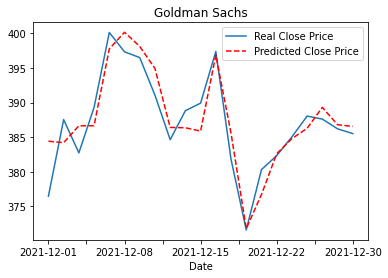

In [ ]:
ax = plt.gca()
plt.title("Goldman Sachs")
df_gs.plot(kind='line',x='Date',y='Close',ax=ax, label = 'Real Close Price')
df_pred_gs.plot(kind='line',x='Date',y='Pred',style='r--',ax=ax,label = 'Predicted Close Price')

J.P Morgan

In [129]:
df_jpm = df_jpm.rename(columns={'Unnamed: 0':'Date'})
df_jpm.reset_index(inplace=True)
df_jpm.drop('index',axis=1,inplace=True)
df_jpm.head(2)

,Date,Open,High,Low,Volume,RSI,%K,Sentiment_index,Close
0,2021-01-04,127.500000,127.860001,124.779999,16819900.0,98.525462,91.9508,-0.2,125.870003
1,2021-01-05,124.989998,126.300003,123.769997,13731200.0,98.525462,91.9508,0.4,125.650002


In [130]:
X_test_jpm = df_jpm[['Open','High','Low','Volume','RSI','%K','Sentiment_index']]
Y_test_jpm = df_jpm['Close']

In [131]:
y_pred_jpm = clf.predict(X_test_jpm)

In [132]:
print("RMSE:",np.sqrt(metrics.mean_squared_error(Y_test_jpm, y_pred_jpm)))

RMSE: 0.6872757167914041


In [65]:
metrics.r2_score(Y_test_jpm,y_pred_jpm)

0.6323759603082519

In [ ]:
df_pred_jpm = df_jpm[['Date']]
df_pred_jpm['Pred'] = y_pred_jpm

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


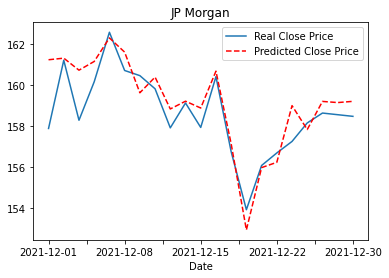

In [ ]:
ax = plt.gca()
plt.title("JP Morgan")
df_jpm.plot(kind='line',x='Date',y='Close',ax=ax, label = 'Real Close Price')
df_pred_jpm.plot(kind='line',x='Date',y='Pred',style='r--',ax=ax,label = 'Predicted Close Price')

Morgan Stanley

In [133]:
df_ms = df_ms.rename(columns={'Unnamed: 0':'Date'})
df_ms.reset_index(inplace=True)
df_ms.drop('index',axis=1,inplace=True)
df_ms.head(2)

,Date,Open,High,Low,Volume,RSI,%K,Sentiment_index,Close
0,2021-01-04,69.279999,69.930000,67.720001,14014600.0,93.924663,85.502692,0.5,68.330002
1,2021-01-05,68.160004,70.080002,68.080002,11120400.0,93.924663,85.502692,0.0,69.489998


In [134]:
X_test_ms = df_ms[['Open','High','Low','Volume','RSI','%K','Sentiment_index']]
Y_test_ms = df_ms['Close']

In [135]:
y_pred_ms = clf.predict(X_test_ms)

In [136]:
print("RMSE",np.sqrt(metrics.mean_squared_error(Y_test_ms, y_pred_ms)))

RMSE 0.47942748269514684


In [ ]:
metrics.r2_score(Y_test_ms,y_pred_ms)

0.6343862293037017

In [ ]:
df_pred_ms = df_ms[['Date']]
df_pred_ms['Pred'] = y_pred_ms

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


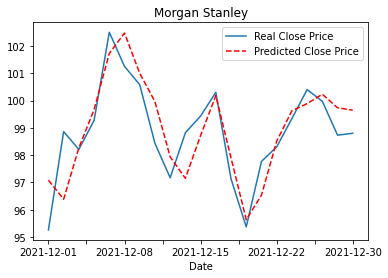

In [ ]:
ax = plt.gca()
plt.title("Morgan Stanley")
df_ms.plot(kind='line',x='Date',y='Close',ax=ax, label = 'Real Close Price')
df_pred_ms.plot(kind='line',x='Date',y='Pred',style='r--',ax=ax,label = 'Predicted Close Price')

Microsoft

In [145]:
df_msft = df_msft.rename(columns={'Unnamed: 0':'Date'})
df_msft.reset_index(inplace=True)
df_msft.drop('index',axis=1,inplace=True)
df_msft.head(2)

,Date,Open,High,Low,Volume,RSI,%K,Sentiment_index,Close
0,2021-01-04,222.529999,223.000000,214.809998,37130100.0,46.508,27.034276,0.35,217.690002
1,2021-01-05,217.259995,218.520004,215.699997,23823000.0,46.508,27.034276,0.45,217.899994


In [146]:
X_test_msft = df_msft[['Open','High','Low','Volume','RSI','%K','Sentiment_index']]
Y_test_msft = df_msft['Close']

In [142]:
clf.fit(X_test_msft[:13], Y_test_msft[:13])

RandomForestRegressor()

In [151]:
y_pred_msft = clf.predict(X_test_msft)

In [152]:
print("RMSE",np.sqrt(metrics.mean_squared_error(Y_test_msft, y_pred_msft)))

RMSE 1.227440863756328


In [ ]:
metrics.r2_score(Y_test_msft,y_pred_msft)

0.8890924729744897

In [ ]:
df_pred_msft = df_msft[['Date']]
df_pred_msft['Pred'] = y_pred_msft

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


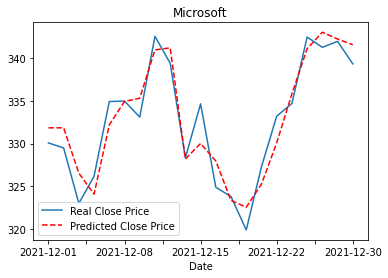

In [ ]:
ax = plt.gca()
plt.title("Microsoft")
df_msft.plot(kind='line',x='Date',y='Close',ax=ax, label = 'Real Close Price')
df_pred_msft.plot(kind='line',x='Date',y='Pred',style='r--',ax=ax,label = 'Predicted Close Price')

Amazon

In [153]:
df_amzn = df_amzn.rename(columns={'Unnamed: 0':'Date'})
df_amzn.reset_index(inplace=True)
df_amzn.drop('index',axis=1,inplace=True)
df_amzn.head(2)

,Date,Open,High,Low,Volume,RSI,%K,Sentiment_index,Close
0,2021-12-01,3545.0,3559.879883,3441.600098,3745800.0,50.097572,65.446477,0.684211,3443.719971
1,2021-12-02,3460.0,3492.699951,3423.750000,3236300.0,50.097572,65.446477,0.400000,3437.360107


In [154]:
X_test_amzn = df_amzn[['Open','High','Low','Volume','RSI','%K','Sentiment_index']]
Y_test_amzn = df_amzn['Close']

In [158]:
y_pred_amzn = clf.predict(X_test_amzn)

In [159]:
metrics.r2_score(Y_test_amzn,y_pred_amzn)

0.9561682894818746

In [113]:
df_pred_amzn = df_amzn[['Date']]
df_pred_amzn['Pred'] = y_pred_amzn

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


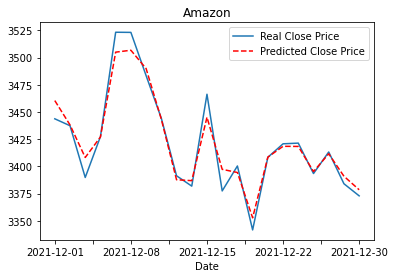

In [114]:
ax = plt.gca()
plt.title("Amazon")
df_amzn.plot(kind='line',x='Date',y='Close',ax=ax, label = 'Real Close Price')
df_pred_amzn.plot(kind='line',x='Date',y='Pred',style='r--',ax=ax,label = 'Predicted Close Price')